In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import plot_confusion_matrix,ConfusionMatrixDisplay,accuracy_score,confusion_matrix

In [2]:
df=pd.read_csv('c:/Users/jadha/Data/Crop_recommendation.csv')
df

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice
...,...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [4]:
df['label'].value_counts().shape

(22,)

In [5]:
df.isna().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

In [6]:
df.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


<AxesSubplot:>

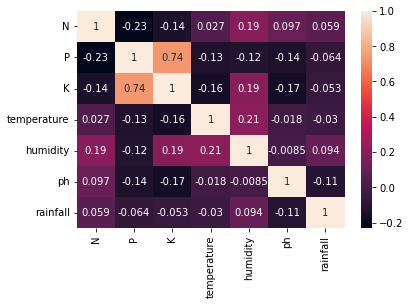

In [7]:
sns.heatmap(df.corr(),annot=True)

In [8]:
x=df.iloc[:,:-1]
y=df['label']

In [9]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=200,random_state=10)

In [10]:
from sklearn.tree import DecisionTreeClassifier,plot_tree
clf=DecisionTreeClassifier(criterion='entropy')
clf.fit(x_train,y_train)
y_predicted=clf.predict(x_test)
#test accuracy
clf.score(x_test,y_test)

0.995

In [11]:
accuracy_score(y_test,y_predicted)

0.995

In [12]:
conf=confusion_matrix(y_test,y_predicted,labels=clf.classes_)
conf

array([[ 3,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0],
       [ 0,  9,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0],
       [ 0,  0, 10,  0,  0,  0,  0,  0,  0,  0,  0,  1,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 10,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 15,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  9,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 17,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  8,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  5,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0, 10,  0,  0,

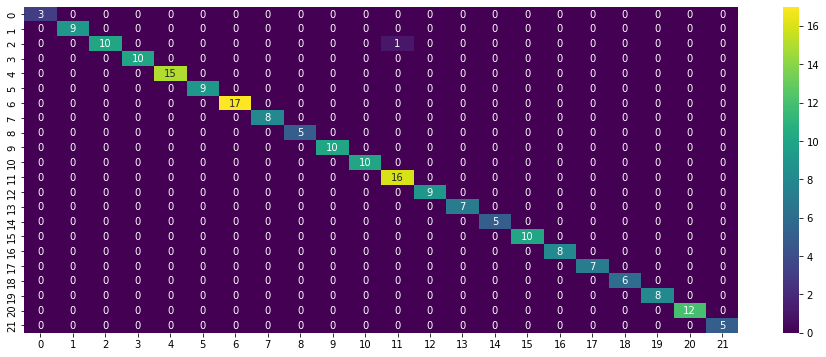

In [13]:
plt.figure(figsize=(16,6))
sns.heatmap(conf,annot=True,cmap='viridis');

# Evalution of model performance

In [14]:
from sklearn.metrics import precision_score,recall_score,f1_score,auc,roc_curve,balanced_accuracy_score

In [15]:
df['label'].unique()

array(['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
       'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple',
       'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee'],
      dtype=object)

In [16]:
precision_score(y_test,y_predicted,average=None)

array([1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 0.94117647, 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        ])

In [17]:
recall_score(y_test,y_predicted,average=None)

array([1.        , 1.        , 0.90909091, 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        ])

# F1_Score

In [18]:
f1=f1_score(y_test,y_predicted,average=None)
f1

array([1.        , 1.        , 0.95238095, 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 0.96969697, 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        ])

In [19]:
np.average(f1)

0.9964580873671782

# Balanced accuracy score

In [20]:
balanced_accuracy_score(y_test,y_predicted)

0.9958677685950413

# K fold cross validation

In [29]:
from sklearn.model_selection import KFold
score=[]
kf=KFold(n_splits=5,shuffle=True)
split=kf.split(df)
for train_index,test_index in split:
    x_train=x.iloc[train_index]
#     print(x_train)
    x_test=x.iloc[test_index]
#     print(x_test)
    y_train=y[train_index]
    y_test=y[test_index]
    
    clf.fit(x_train,y_train)
    score.append(clf.score(x_test,y_test))
score

[0.9863636363636363,
 0.990909090909091,
 0.9772727272727273,
 0.9863636363636363,
 0.9931818181818182]

# KNN CLASSIFICATION

In [21]:
x.head()

,N,P,K,temperature,humidity,ph,rainfall
0,90,42,43,20.879744,82.002744,6.502985,202.935536
1,85,58,41,21.770462,80.319644,7.038096,226.655537
2,60,55,44,23.004459,82.320763,7.840207,263.964248
3,74,35,40,26.491096,80.158363,6.980401,242.864034
4,78,42,42,20.130175,81.604873,7.628473,262.717340


In [22]:
x_test

,N,P,K,temperature,humidity,ph,rainfall
299,49,69,82,18.315615,15.361435,7.263119,81.787105
1859,37,10,32,28.963183,95.163337,6.165085,222.803013
1939,122,48,16,24.654258,75.635071,6.307586,61.829801
2194,97,35,26,24.914610,53.741447,6.334610,166.254931
1861,31,29,35,27.187228,92.199068,6.137103,141.322058
...,...,...,...,...,...,...,...
1925,105,60,23,23.533714,77.217056,6.207652,87.540049
48,79,43,39,21.666283,80.709606,7.062779,210.814209
1196,21,21,30,27.698193,51.415932,5.403908,100.772070
1653,14,22,9,17.249446,91.137728,6.543192,112.509052


In [23]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()

In [24]:
x_train=scaler.fit_transform(x_train)
x_test=scaler.fit_transform(x_test)
x_test

array([[0.36567164, 0.45714286, 0.38383838, ..., 0.01269789, 0.73193531,
        0.22086398],
       [0.2761194 , 0.03571429, 0.13131313, ..., 0.94392112, 0.51809515,
        0.73394755],
       [0.91044776, 0.30714286, 0.05050505, ..., 0.71604215, 0.54584697,
        0.14824973],
       ...,
       [0.15671642, 0.11428571, 0.12121212, ..., 0.43342452, 0.36985734,
        0.2899404 ],
       [0.10447761, 0.12142857, 0.01515152, ..., 0.89694554, 0.59173083,
        0.33264517],
       [0.8880597 , 0.02857143, 0.22222222, ..., 0.81271575, 0.5348828 ,
        0.07171249]])

In [25]:
from sklearn.neighbors import KNeighborsClassifier
clf2=KNeighborsClassifier(n_neighbors=9,weights='distance',p=2)
clf2.fit(x_train,y_train)
y_predicted2=clf2.predict(x_test)

In [26]:
clf2.score(x_test,y_test)

0.975

# finding best k

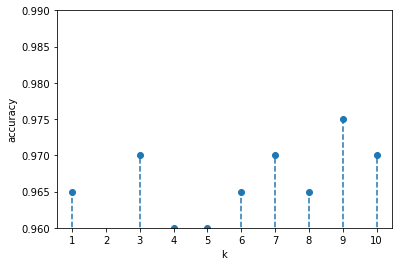

In [27]:
k_value= range(1,11)
scores = []

for k in k_value:
    clf2= KNeighborsClassifier(n_neighbors = k)
    clf2.fit(x_train, y_train)
    scores.append(clf2.score(x_test, y_test))

plt.xlabel('k')
plt.ylabel('accuracy')
plt.scatter(k_value, scores)
plt.vlines(k_value,0, scores, linestyle="dashed")
plt.ylim(0.96,0.99)
plt.xticks([i for i in range(1,11)]);

from above figur we conclude that k=9 is th best ,so thats why i was taken k=9 in this classification

# Gradiant boostiong

In [28]:
from sklearn.ensemble import GradientBoostingClassifier
gbclf=GradientBoostingClassifier()
gbclf.fit(x_train,y_train)
y_predicted3=gbclf.predict(x_test)
gbclf.score(x_test,y_test)

0.95

 from above  classification methods it is clear that decission tree perform well